In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col].replace(0, df[col].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [12]:
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[75 25]
 [16 38]]


In [13]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

Accuracy : 0.7337662337662337
Precision: 0.6031746031746031
Recall   : 0.7037037037037037
F1-Score : 0.6495726495726496


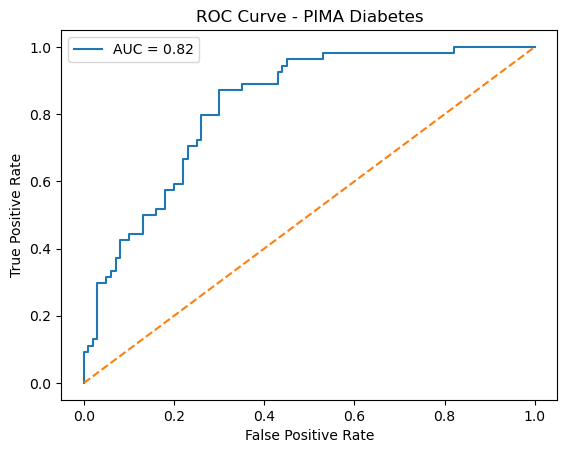

In [14]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PIMA Diabetes")
plt.legend()
plt.show()

In [15]:
cv_scores = cross_val_score(
    LogisticRegression(max_iter=1000, class_weight="balanced"),
    X_train_scaled,
    y_train,
    cv=5,
    scoring="f1"
)

print("CV F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

CV F1 Scores: [0.63265306 0.7032967  0.60606061 0.70731707 0.68181818]
Mean CV F1: 0.6662291251141426


In [16]:
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for c in C_values:
    lr = LogisticRegression(
        C=c,
        max_iter=1000,
        class_weight="balanced"
    )
    lr.fit(X_train_scaled, y_train)
    train_scores.append(lr.score(X_train_scaled, y_train))
    test_scores.append(lr.score(X_test_scaled, y_test))

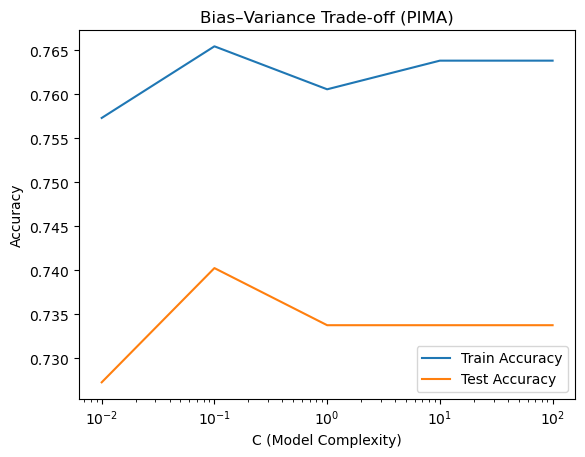

In [17]:
plt.plot(C_values, train_scores, label="Train Accuracy")
plt.plot(C_values, test_scores, label="Test Accuracy")
plt.xscale("log")
plt.xlabel("C (Model Complexity)")
plt.ylabel("Accuracy")
plt.title("Bias–Variance Trade-off (PIMA)")
plt.legend()
plt.show()
